In [6]:
%matplotlib inline
import os, sys
import time
import pyvisa
import warnings
import numpy as np
import qcodes as qc
import matplotlib.pyplot as plt

def find_qcodes_local_dir():
    dirpath = os.getcwd()
    while True:
        dirpath, folder_name = os.path.split(dirpath)
        if folder_name == 'QCoDeS_local':
            return os.path.join(dirpath, folder_name)
        if not folder_name:  # Reached the root directory
            return None
qcodes_local_dir = find_qcodes_local_dir()
sys.path.append(f'{qcodes_local_dir}')

from tqdm import tqdm
from pprint import pprint
from time import sleep, monotonic, time
from IPython.display import clear_output, display, HTML
from qcodes.dataset.measurements import Measurement
from qcodes.utils.metadata import diff_param_values
from qcodes.dataset.plotting import plot_dataset, plot_by_id
from qcodes import Parameter, ManualParameter, ScaledParameter
from qcodes.instrument.specialized_parameters import ElapsedTimeParameter
from qcodes import ManualParameter, ScaledParameter
from sweeps_v2 import do1d, do2d, time_sweep, measure_until, do1d_until

from Test.Analysis_functions_v3 import *

print('Imported all modules, QCoDeS version:', qc.__version__, 'initialized')

Imported all modules, QCoDeS version: 0.38.1 initialized


In [2]:
def get_qcodes_local_path(PC_name = "116-1"):
    """
    根據選擇的代號獲取對應的路徑。

    參數:
    PC_name (str): 電腦的代號, P6F-1, P6f-2, 116-1, 116-2, Albert-Mac

    返回:
    str: 對應的路徑，如果代號不存在則返回 None

    """
    # 定義代號到路徑的映射
    qcodes_local_dir_dict = {
        "116-1": "C:\\Users\\admin\\Documents\\GitHub\\QCoDeS_local",
        "116-2": "C:\\Users\\quant\\OneDrive\\Documents\\GitHub\\QCoDeS_local",
        "P6F-1": "C:\\Users\\admin\\Documents\\GitHub\\QCoDeS_local",
        "P6f-2": "C:\\Users\\Ke Lab\\Documents\\GitHub\\QCoDeS_local",
        "Albert-Mac": "/Users/albert-mac/Code/GitHub/QCoDeS_local"
    }

    # 報錯: 未找到對應的路徑
    if PC_name not in qcodes_local_dir_dict:
        raise ValueError(f"未找到代號 {PC_name} 對應的路徑, 請輸入以下代號之一: {', '.join(qcodes_local_dir_dict.keys())}")
    
    # 根據代號獲取對應的路徑
    return qcodes_local_dir_dict.get(PC_name)

def find_init_file(file_name, PC_name="116-1"):
    qcodes_local_path = get_qcodes_local_path(PC_name)
    if qcodes_local_path:
        for root, dirs, files in os.walk(qcodes_local_path):
            if file_name in files:
                return os.path.join(root, file_name)
    return None


def path_display(paths):
    for name, file_path in paths.items():
        if file_path:
            display(HTML(f'{name}:<br><a href="file://{file_path}" target="_blank">{file_path}</a>'))
        else:
            print(f"{name}: {file_path} not found")

# 使用字典來存放變數名及其值
paths = {
    'qcodes_local_path': get_qcodes_local_path("116-1"),
    'init_database_py_path': find_init_file('init_database_v2.py'),
    'init_fridge_py_path': find_init_file('init_fridge_v2.py'),
    'init_BF1_path': find_init_file('init_BF1_v2.py')
}

# 調用 path_display 函數
path_display(paths)

In [3]:
fridge_name = 'BF1'
%run {paths["init_fridge_py_path"]} {fridge_name}

Found init_BF1_v2.py at: c:\Users\admin\Documents\GitHub\QCoDeS_local\fridge_specific\init_BF1_v2.py
Device: TCPIP0::K-E5080B-02870::inst0::INSTR
IDN: Keysight Technologies,E5080B,MY59202870,A.15.10.08

Error connecting to ASRL1::INSTR: VI_ERROR_TMO (-1073807339): Timeout expired before operation completed.
Device: GPIB0::7::INSTR
IDN: KEITHLEY INSTRUMENTS,MODEL DMM6500,04518181,1.7.7b

Connected to: KEITHLEY INSTRUMENTS DMM6500 (serial:04518181, firmware:1.7.7b) in 0.02s
Added Keithley DMM6500 at GPIB0::7::INSTR to the station.
Device: GPIB0::22::INSTR
IDN: KEITHLEY INSTRUMENTS INC.,MODEL 2440,1225508,C30   Mar 17 2006 09:29:29/A02  /B/A

Connected to: KEITHLEY INSTRUMENTS INC. 2440 (serial:1225508, firmware:C30   Mar 17 2006 09:29:29/A02  /B/A) in 0.03s


[K2440(Keithley2400)] Snapshot: Could not update parameter: volt
[K2440(Keithley2400)] Snapshot: Could not update parameter: curr
[K2440(Keithley2400)] Snapshot: Could not update parameter: resistance


Connected to: AMERICAN MAGNETICS INC. 430 (serial:430-22-114, firmware:3.15) in 2.03s
Connected to: AMERICAN MAGNETICS INC. 430 (serial:430-22-113, firmware:3.15) in 1.20s
Connected to: AMERICAN MAGNETICS INC. 430 (serial:430-22-111, firmware:3.15) in 1.04s
z, IP: 169.254.115.3, Port: 7180
y, IP: 169.254.115.2, Port: 7180
x, IP: 169.254.115.1, Port: 7180


C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\qcodes\instrument\instrument_base.py:543: UserWarning: Changed AMI430-3D to AMI430_3D for instrument identifier
  warnings.warn(f"Changed {name} to {new_name} for instrument identifier")


Added z to the station.
Added y to the station.
Added x to the station.
Added AMI430_3D to the station.

Station list:
{'AMI430_3D': <AMI430_3D: AMI430_3D>,
 'DMM6500': <Keithley_6500: DMM6500>,
 'K2440': <Keithley2400: K2440>,
 'x': <AMI430: x>,
 'y': <AMI430: y>,
 'z': <AMI430: z>}


In [4]:
reuse = True
%run {paths["init_database_py_path"]} {reuse}

Creating a new database file:
c:\Users\admin\Documents\GitHub\QCoDeS_local\personal_scripts\Albert\024-1Shankar\024-1Shankar_2024-08-26_01.db


In [7]:
Irange = Parameter('Irange', label='current range', unit='', set_cmd=None, get_cmd=None)
Vrange = Parameter('Vrange', label='voltage range', unit='', set_cmd=None, get_cmd=None)
TGrange = Parameter('TGrange', label='Top gate range', unit='', set_cmd=None, get_cmd=None)

#division paraemtrs required for simplier update: they used as an argument for scaled paraemtrs of sorce instruments

Irange_division = Parameter('Irange_division', 
                            label='scaled current range', unit='', 
                            set_cmd=None, get_cmd=lambda : 1 / Irange())

Vrange_division = Parameter('Vrange_division', 
                            label='scaled voltage range', unit='', 
                            set_cmd=None, get_cmd=lambda : 1 / Vrange())

TGrange_division = Parameter('TGrange_division', 
                             label='scaled Top gate range', unit='', 
                             set_cmd=None, get_cmd=lambda : 1 / TGrange())

Irange_AC_division = Parameter('Irange_AC_division', 
                               label='scaled current range for lockin', unit='', 
                               set_cmd=None, get_cmd=lambda : 1 / Irange())

Vrange_AC_division = Parameter('Vrange_AC_division', 
                               label='scaled voltage range for lockin', unit='', 
                               set_cmd=None, get_cmd=lambda : 1 / Vrange())

Gain_K1 = Parameter('Gain_K1', label='Gain K1', unit='', set_cmd=None, get_cmd=None)
Gain_K2 = Parameter('Gain_K2', label='Gain K2', unit='', set_cmd=None, get_cmd=None)
Gain_L1 = Parameter('Gain_L1', label='Gain L1', unit='', set_cmd=None, get_cmd=None)
Gain_L2 = Parameter('Gain_L2', label='Gain L2', unit='', set_cmd=None, get_cmd=None)

#Add components
station.add_component(Irange)
station.add_component(Vrange)
station.add_component(TGrange)

station.add_component(Irange_division)
station.add_component(Vrange_division)
station.add_component(TGrange_division)

station.add_component(Irange_AC_division)
station.add_component(Vrange_AC_division)
                             
station.add_component(Gain_K1)
station.add_component(Gain_K2)
station.add_component(Gain_L1)
station.add_component(Gain_L2)

'Gain_L2'

In [8]:
Irange.set(1e-6) #Unit Amp V=IR, 1V= 1e-6 x 1MOhm=1e-7 x 10MOhm
Vrange.set(10) ## need to be sync with K213 range #Unit Volt
TGrange.set(1) #Unit Volt
Gain_K1.set(100)
Gain_K2.set(100)
# Gain_K3.set(1e2)
Gain_L1.set(Gain_K1())
Gain_L2.set(Gain_K2())
#division parameters are updated automatically

In [9]:
appl_current = ScaledParameter(K2440.volt, division = Irange_division, name = 'appl_current', unit = 'A')
meas_voltage_K2 = ScaledParameter(DMM6500.amplitude, division = Gain_K2, name = 'meas_voltage_K2', unit = 'V')
meas_current_K2 = ScaledParameter(DMM6500.amplitude, division = Gain_K2, name = 'meas_current_K2', unit = 'A')
meas_leakage = ScaledParameter(DMM6500.amplitude, division = Gain_K2, name = 'meas_leakage', unit = 'A')
station.add_component(appl_current)
station.add_component(meas_voltage_K2)
station.add_component(meas_current_K2)
station.add_component(meas_leakage)

'meas_leakage'

In [10]:
def get_R_from_IV(dataid):
    dataset = qc.load_by_id(dataid)

    voltage = dataset.get_parameter_data()['meas_voltage_K2']['meas_voltage_K2']
    current = dataset.get_parameter_data()['meas_voltage_K2']['appl_current']
    fit_values = np.polyfit(current,voltage,1)
    
    return fit_values[0]

def get_R_from_IV_2(dataid):
    dataset = qc.load_by_id(dataid)

    voltage = dataset.get_parameter_data()['meas_voltage_K2']['meas_voltage_K2']
    current = dataset.get_parameter_data()['meas_voltage_K2']['appl_current']
    fit_values = np.polyfit(current,voltage,1)
    
    return fit_values[0]

In [25]:
K2440.rangev()
# K2440.output(1)
# K2440.volt()


10.5

In [33]:
DMM6500.averaging_enabled(False)

In [29]:
DMM6500.averaging_count(5)

In [18]:
magnet_x.field(60e-3)
magnet_x.field()

0.059999388

In [20]:
magnet_x.field(50e-3)
magnet_x.field()

0.050066584

Starting experimental run with id: 1. 


100%|██████████| 101/101 [00:06<00:00, 16.00it/s]
Trying to mark a run completed that was already completed.


NameError: name 'IV' is not defined

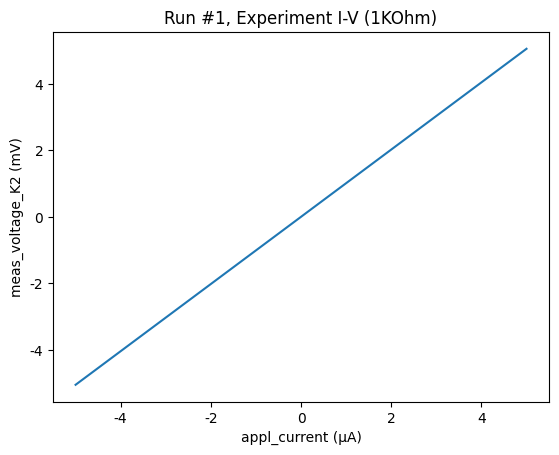

In [34]:
K2440.output(1)
exp = qc.new_experiment('I-V', sample_name=f'')
dataid = do1d(appl_current, -5e-6 ,5e-6, 101, 30e-3, meas_voltage_K2)
appl_current(0)
K2440.output(0)
plot_by_id(dataid)
# IV(dataid)
# IV_diff(dataid)
# plot_IV_and_dVdI(dataid)


In [35]:
get_R_from_IV(dataid)

1009.7675073756552